## 6 Multi Variable Gradient Descent: Problem Statement

You will use the motivating example of housing price prediction. The training dataset contains three examples with four features (size, bedrooms, floors and, age) shown in the table below.  Note that, unlike the earlier labs, size is in sqft rather than 1000 sqft. This causes an issue, which you will solve in the next lab!

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  

You will build a linear regression model using these values so you can then predict the price for other houses. For example, a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old.  

Please run the following code cell to create your `X_train` and `y_train` variables.

<a name="toc_15456_2.1"></a>
### 6.1 Matrix X containing our examples
Similar to the table above, examples are stored in a NumPy matrix `X_train`. Each row of the matrix represents one example. When you have $m$ training examples ( $m$ is three in our example), and there are $n$ features (four in our example), $\mathbf{X}$ is a matrix with dimensions ($m$, $n$) (m rows, n columns).


$$\mathbf{X} = 
\begin{pmatrix}
 x^{(0)}_0 & x^{(0)}_1 & \cdots & x^{(0)}_{n-1} \\ 
 x^{(1)}_0 & x^{(1)}_1 & \cdots & x^{(1)}_{n-1} \\
 \cdots \\
 x^{(m-1)}_0 & x^{(m-1)}_1 & \cdots & x^{(m-1)}_{n-1} 
\end{pmatrix}
$$
notation:
- $\mathbf{x}^{(i)}$ is vector containing example i. $\mathbf{x}^{(i)}$ $ = (x^{(i)}_0, x^{(i)}_1, \cdots,x^{(i)}_{n-1})$
- $x^{(i)}_j$ is element j in example i. The superscript in parenthesis indicates the example number while the subscript represents an element.  

Display the input data.

<a name="toc_15456_2.2"></a>
### 6.2 Parameter vector w, b

* $\mathbf{w}$ is a vector with $n$ elements.
  - Each element contains the parameter associated with one feature.
  - in our dataset, n is 4.
  - notionally, we draw this as a column vector

$$\mathbf{w} = \begin{pmatrix}
w_0 \\ 
w_1 \\
\cdots\\
w_{n-1}
\end{pmatrix}
$$
* $b$ is a scalar parameter.  

In [1]:
# All required imports
import numpy as np
import matplotlib.pyplot as plt
import util
import copy
import math
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Sample data
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

util.print_training_data(x_train, y_train)

+------+-----+-----+-----+---------+
| x0s  | x1s | x2s | x3s | y_train |
+------+-----+-----+-----+---------+
| 2104 |  5  |  1  |  45 |   460   |
| 1416 |  3  |  2  |  40 |   232   |
| 852  |  2  |  1  |  35 |   178   |
+------+-----+-----+-----+---------+


<a name="toc_15456_3"></a>
### 6.3 Model Prediction With Multiple Variables
The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector `dot product`

To demonstrate the dot product, we will implement prediction using (1) and (2).a

<a name="toc_15456_4"></a>
### 6.4 Compute Cost With Multiple Variables
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 


In contrast to previous labs, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features.

<a name="toc_15456_5"></a>
### 6.5 Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


In [3]:
w_initial = np.ones(x_train.shape[1])
b_initial = 0

util.print_intermediate_details(x_train, y_train, w_initial, b_initial)

+------+-----+-----+-----+------+---------+-------+
| x0s  | x1s | x2s | x3s | f_wb | y_train | error |
+------+-----+-----+-----+------+---------+-------+
| 2104 |  5  |  1  |  45 | 2155 |   460   |  1695 |
| 1416 |  3  |  2  |  40 | 1461 |   232   |  1229 |
| 852  |  2  |  1  |  35 | 890  |   178   |  712  |
+------+-----+-----+-----+------+---------+-------+



+------------------+------------------+------------------+------------------+
| sum(error * x0s) | sum(error * x1s) | sum(error * x2s) | sum(error * x3s) |
+------------------+------------------+------------------+------------------+
|     5913168      |      13586       |       4865       |      150355      |
+------------------+------------------+------------------+------------------+



+---------+----------+----------+-----------+
|  dj_dw0 |  dj_dw1  |  dj_dw2  |   dj_dw3  |
+---------+----------+----------+-----------+
| 1971056 | 4528.667 | 1621.667 | 50118.333 |
+---------+----------+----------+-----------+


In [4]:
(2104*1695 + 1416*1229 + 852*712) / 3

1971056.0

In [5]:
import linear_regression as lr

In [6]:
w, b, cost_history = lr.gradient_descent(x_train, y_train, w_initial, b_initial, 5.0e-7, 0.1, 100000, True)

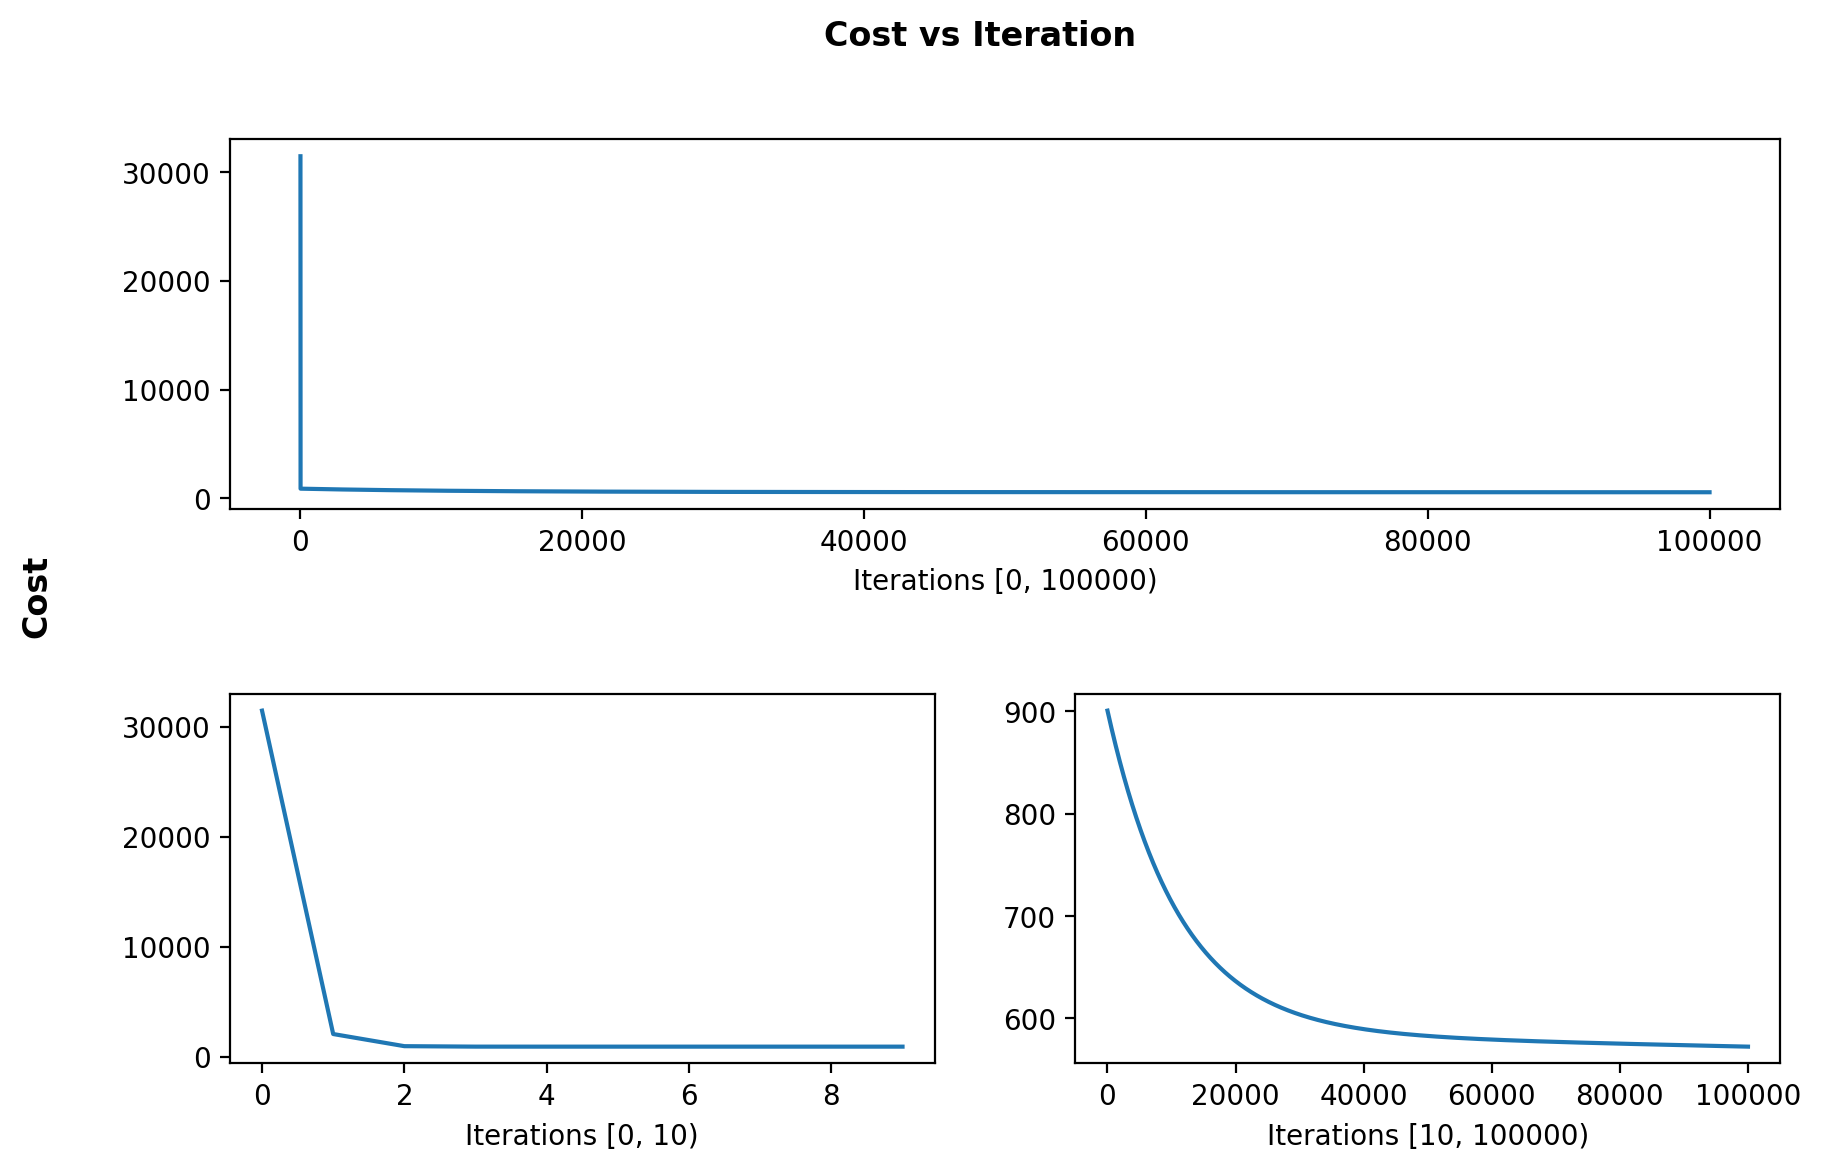

In [7]:
util.plot_cost_history(cost_history, 10)

In [8]:
print(f'w: {w}, b: {b}')

w: [ 0.23987759  1.2932253   0.08581777 -1.6034123 ], b: -0.07750359058455086
